In [80]:
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt

# Import des données

In [81]:
files = glob.glob('2013_departement/*.xls')
files

['2013_departement/depa110_13.xls',
 '2013_departement/depa210_13.xls',
 '2013_departement/depa310_13.xls',
 '2013_departement/depa410_13.xls',
 '2013_departement/depa430_13.xls',
 '2013_departement/depa440_13.xls',
 '2013_departement/depa450_13.xls',
 '2013_departement/depa510_13.xls',
 '2013_departement/depa520_13.xls',
 '2013_departement/depa530_13.xls',
 '2013_departement/depa540_13.xls',
 '2013_departement/depa610_13.xls',
 '2013_departement/depa620_13.xls',
 '2013_departement/depa630_13.xls',
 '2013_departement/depa710_13.xls',
 '2013_departement/depa720_13.xls',
 '2013_departement/depa730_13.xls']

In [82]:
df = pd.read_excel(files[0])
for f in files[1:]:
    df_temp = pd.read_excel(f)
    df.append(df_temp)
df

,SPECIALITE,DEPARTEMENT,NON CONVENTIONNES,CONVENTIONNES,CONVENTIONNES AVEC DEPASSEMENT,HONORAIRES LIBRES,TOTAL,POPULATION,DENSITE /100000 Hab.
0,01- Médecine générale,01- Ain,2,371,0,17,390,6.212461e+05,62.777055
1,01- Médecine générale,02- Aisne,2,357,0,7,366,5.448426e+05,67.175364
2,01- Médecine générale,03- Allier,1,252,0,4,257,3.439814e+05,74.713340
3,01- Médecine générale,04- Alpes-Hte-Provence,1,152,0,4,157,1.636114e+05,95.959056
4,01- Médecine générale,05- Hautes-Alpes,0,141,0,14,155,1.420146e+05,109.143730
5,01- Médecine générale,06- Alpes-Maritimes,14,984,0,196,1194,1.083433e+06,110.205257
6,01- Médecine générale,07- Ardèche,4,234,0,6,244,3.222801e+05,75.710540
7,01- Médecine générale,08- Ardennes,0,239,0,0,239,2.830571e+05,84.435275
8,01- Médecine générale,09- Ariège,0,146,0,0,146,1.541014e+05,94.742793
9,01- Médecine générale,10- Aube,0,209,0,5,214,3.067759e+05,69.757771


In [83]:
#def contains_total(sentence):
#    if('TOTAL' in sentence.upper()):
#        return False
#    else:
#        return True
total_specialite_slicer = df['SPECIALITE'].str.upper().str.contains("TOTAL")
total_departement_slicer = df['DEPARTEMENT'].str.upper().str.contains("TOTAL")
df2 = df[~total_specialite_slicer & ~total_departement_slicer]

df2.head()

,SPECIALITE,DEPARTEMENT,NON CONVENTIONNES,CONVENTIONNES,CONVENTIONNES AVEC DEPASSEMENT,HONORAIRES LIBRES,TOTAL,POPULATION,DENSITE /100000 Hab.
0,01- Médecine générale,01- Ain,2,371,0,17,390,621246.090995,62.777055
1,01- Médecine générale,02- Aisne,2,357,0,7,366,544842.598943,67.175364
2,01- Médecine générale,03- Allier,1,252,0,4,257,343981.411458,74.713340
3,01- Médecine générale,04- Alpes-Hte-Provence,1,152,0,4,157,163611.447328,95.959056
4,01- Médecine générale,05- Hautes-Alpes,0,141,0,14,155,142014.571587,109.143730


In [84]:
df2['DEPARTEMENT NUM'] = df2['DEPARTEMENT'].str.split('-').str.get(0)
df2['DEPARTEMENT'] = df2['DEPARTEMENT'].str.extract('[\dAB]+-(.*)')

df2['SPECIALITE'] = df2['SPECIALITE'].str.split('-', 1).str.get(1)

/Users/remi/Desktop/Cours/P1/StarterKitBD/StarterKit_venv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/remi/Desktop/Cours/P1/StarterKitBD/StarterKit_venv3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/Users/remi/Desktop/Cours/P1/StarterKitBD/StarterKit_venv3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [86]:
df2['CONVENTIONNES'] = df2['CONVENTIONNES'] / df2['TOTAL']
df2['CONVENTIONNES AVEC DEPASSEMENT'] = df2['CONVENTIONNES AVEC DEPASSEMENT'] / df2['TOTAL']
df2['HONORAIRES LIBRES'] = df2['HONORAIRES LIBRES'] / df2['TOTAL']
df2

/Users/remi/Desktop/Cours/P1/StarterKitBD/StarterKit_venv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/remi/Desktop/Cours/P1/StarterKitBD/StarterKit_venv3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/remi/Desktop/Cours/P1/StarterKitBD/StarterKit_venv3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,SPECIALITE,DEPARTEMENT,NON CONVENTIONNES,CONVENTIONNES,CONVENTIONNES AVEC DEPASSEMENT,HONORAIRES LIBRES,TOTAL,POPULATION,DENSITE /100000 Hab.,DEPARTEMENT NUM
0,Médecine générale,Ain,2,0.951282,0.0,0.043590,390,6.212461e+05,62.777055,01
1,Médecine générale,Aisne,2,0.975410,0.0,0.019126,366,5.448426e+05,67.175364,02
2,Médecine générale,Allier,1,0.980545,0.0,0.015564,257,3.439814e+05,74.713340,03
3,Médecine générale,Alpes-Hte-Provence,1,0.968153,0.0,0.025478,157,1.636114e+05,95.959056,04
4,Médecine générale,Hautes-Alpes,0,0.909677,0.0,0.090323,155,1.420146e+05,109.143730,05
5,Médecine générale,Alpes-Maritimes,14,0.824121,0.0,0.164154,1194,1.083433e+06,110.205257,06
6,Médecine générale,Ardèche,4,0.959016,0.0,0.024590,244,3.222801e+05,75.710540,07
7,Médecine générale,Ardennes,0,1.000000,0.0,0.000000,239,2.830571e+05,84.435275,08
8,Médecine générale,Ariège,0,1.000000,0.0,0.000000,146,1.541014e+05,94.742793,09
9,Médecine générale,Aube,0,0.976636,0.0,0.023364,214,3.067759e+05,69.757771,10


In [87]:
df2 = df2.dropna(subset=["CONVENTIONNES"])
df2

,SPECIALITE,DEPARTEMENT,NON CONVENTIONNES,CONVENTIONNES,CONVENTIONNES AVEC DEPASSEMENT,HONORAIRES LIBRES,TOTAL,POPULATION,DENSITE /100000 Hab.,DEPARTEMENT NUM
0,Médecine générale,Ain,2,0.951282,0.0,0.043590,390,6.212461e+05,62.777055,01
1,Médecine générale,Aisne,2,0.975410,0.0,0.019126,366,5.448426e+05,67.175364,02
2,Médecine générale,Allier,1,0.980545,0.0,0.015564,257,3.439814e+05,74.713340,03
3,Médecine générale,Alpes-Hte-Provence,1,0.968153,0.0,0.025478,157,1.636114e+05,95.959056,04
4,Médecine générale,Hautes-Alpes,0,0.909677,0.0,0.090323,155,1.420146e+05,109.143730,05
5,Médecine générale,Alpes-Maritimes,14,0.824121,0.0,0.164154,1194,1.083433e+06,110.205257,06
6,Médecine générale,Ardèche,4,0.959016,0.0,0.024590,244,3.222801e+05,75.710540,07
7,Médecine générale,Ardennes,0,1.000000,0.0,0.000000,239,2.830571e+05,84.435275,08
8,Médecine générale,Ariège,0,1.000000,0.0,0.000000,146,1.541014e+05,94.742793,09
9,Médecine générale,Aube,0,0.976636,0.0,0.023364,214,3.067759e+05,69.757771,10


In [88]:
# On juge que s'il y a moins de 10 médecins spécialisés dans un région 
# le ratio des conventionnésn'est pas représentatif
df_tot_sup10 = df2.loc[df2["TOTAL"] >= 10].groupby(['SPECIALITE', 'DEPARTEMENT']).sum().sort_values(['HONORAIRES LIBRES'], ascending=0)
df_tot_sup10

NON CONVENTIONNES  \
SPECIALITE                                 DEPARTEMENT                                
 Chirurgie urologique                       Indre-et-Loire                        0   
 Chirurgie viscérale et digestive           Gironde                               0   
 Chirurgie orthopédique et traumatologie    Martinique                            0   
 Chirurgie urologique                       Gironde                               0   
 Chirurgie orthopédique et traumatologie    Puy-de-Dôme                           0   
 Chirurgie urologique                       Haute-Vienne                          0   
 Chirurgie orthopédique et traumatologie    Loiret                                0   
                                            Indre-et-Loire                        0   
 Neurochirurgie                             Bouches-du-Rhône                      0   
 Chirurgie urologique                       Bouches-du-Rhône                      0   
                                            Isère                                 0   
 Chirurgie orthopédique et traumatologie    Pyrénées-Orientales                   0   
 Chirurgie vasculaire                       Rhône                                 0   
 Chirurgie urologique                       Alpes-Maritimes                       0   
 Oncologie médicale                         Alpes-Maritimes                       0   
 Chirurgie thoracique et cardio-vasculaire  Rhône                                 0   
 Chirurgie viscérale et digestive           Rhône                                 0   
 Chirurgie infantile                        Rhône                                 0   
 Chirurgie vasculaire                       Alpes-Maritimes                       0   
 Chirurgie viscérale et digestive           Hérault                               0   
 Chirurgie urologique                       Val-de-Marne                          0   
 Chirurgie générale                         Isère                                 0   
 Chirurgie urologique                       Seine-et-Marne                        0   
                                            Seine-St-Denis                        0   
 Chirurgie viscérale et digestive           Saône-et-Loire                        0   
 Chirurgie maxillo-faciale et stomatologie  Rhône                                 0   
 Chirurgie urologique                       Rhône                                 0   
                                            Pyrénées-Atlantiques                  0   
 Chirurgie orthopédique et traumatologie    Hérault                               0   
                                            Yvelines                              0   
...                                                                             ...   
 Infirmiers                                 Ariège                                0   
                                            Guyane                                0   
                                            Côtes-d'Armor                         0   
                                            Guadeloupe                            0   
                                            Gironde                               0   
                                            Gers                                  0   
                                            Gard                                  0   
                                            Finistère                             0   
                                            Eure-et-Loir                          0   
                                            Eure                                  0   
                                            Essonne                               0   
                                            Drôme                                 0   
                                            Doubs                                 0   
                                            Dordogne            

In [42]:
# Ratio des honoraires en moyenne par département:
hon_moy_dpt = df_tot_sup10.groupby('DEPARTEMENT')['HONORAIRES LIBRES'].mean()
hon_moy_dpt_max = hon_moy_dpt.sort_values(ascending=False).head(10)
hon_moy_dpt_max

DEPARTEMENT
 Paris (Ville)      0.554506
 Rhône              0.512214
 Hauts-de-Seine     0.474383
 Alpes-Maritimes    0.446959
 Yvelines           0.440188
 Val-de-Marne       0.395492
 Seine-et-Marne     0.375018
 Gironde            0.366735
 Essonne            0.357191
 Isère              0.340344
Name: HONORAIRES LIBRES, dtype: float64

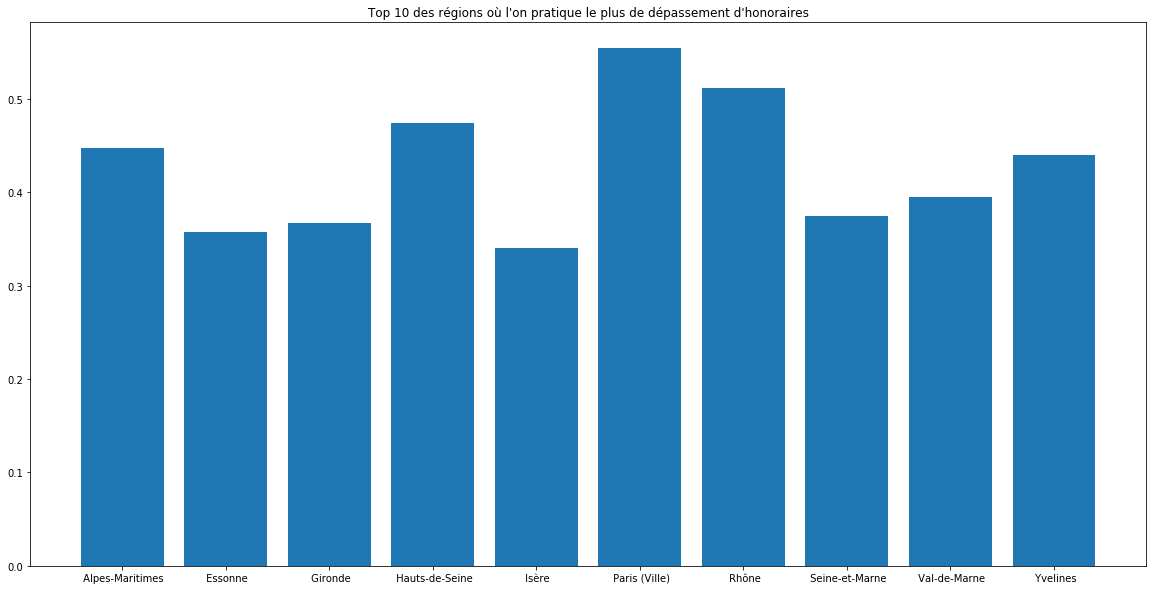

In [43]:
plt.figure(figsize=(20,10))
plt.bar(hon_moy_dpt_max.index, 
        hon_moy_dpt_max.values) 
plt.title("Top 10 des régions où l'on pratique le plus de dépassement d'honoraires")
plt.show()

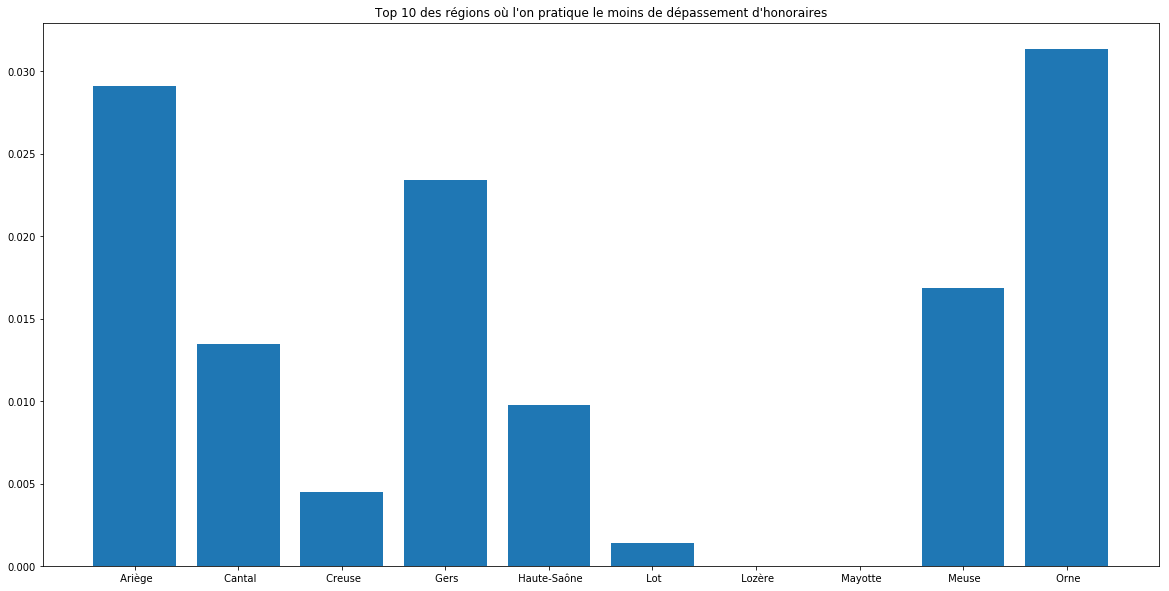

In [44]:
hon_moy_dpt_min = hon_moy_dpt.sort_values(ascending=False).tail(10)
plt.figure(figsize=(20,10))
plt.bar(hon_moy_dpt_min.index, 
        hon_moy_dpt_min.values) 
plt.title("Top 10 des régions où l'on pratique le moins de dépassement d'honoraires")
plt.show()

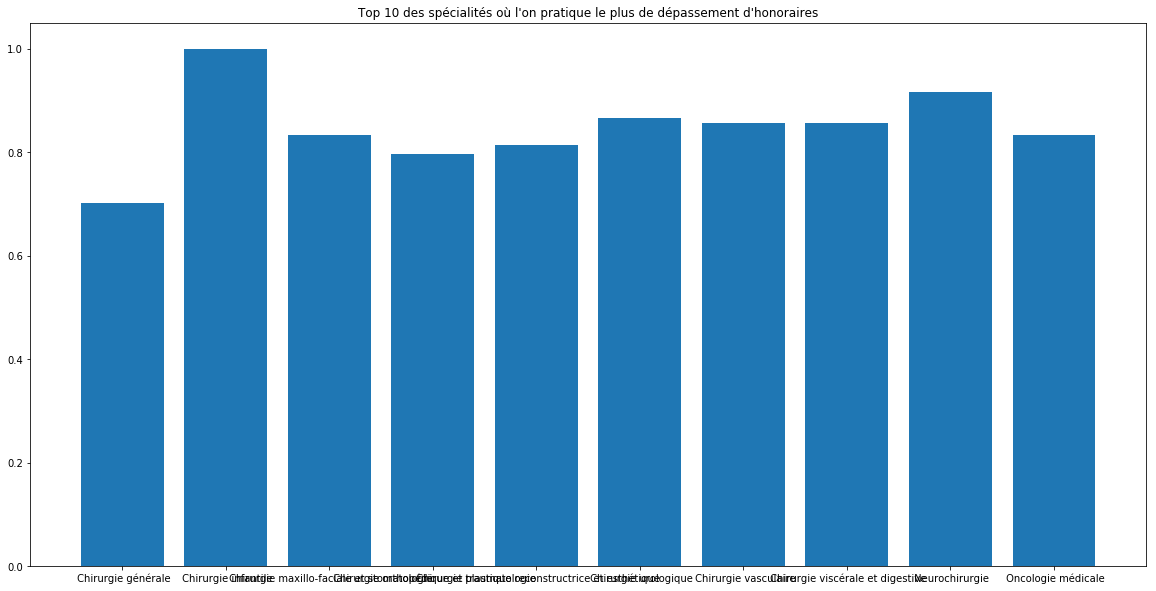

In [45]:
# Ratio des honoraires en moyenne par département:
hon_moy_spe = df_tot_sup10.groupby('SPECIALITE')['HONORAIRES LIBRES'].mean()
hon_moy_spe_max = hon_moy_spe.sort_values(ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.bar(hon_moy_spe_max.index, 
        hon_moy_spe_max.values) 
plt.title("Top 10 des spécialités où l'on pratique le plus de dépassement d'honoraires")
plt.show()

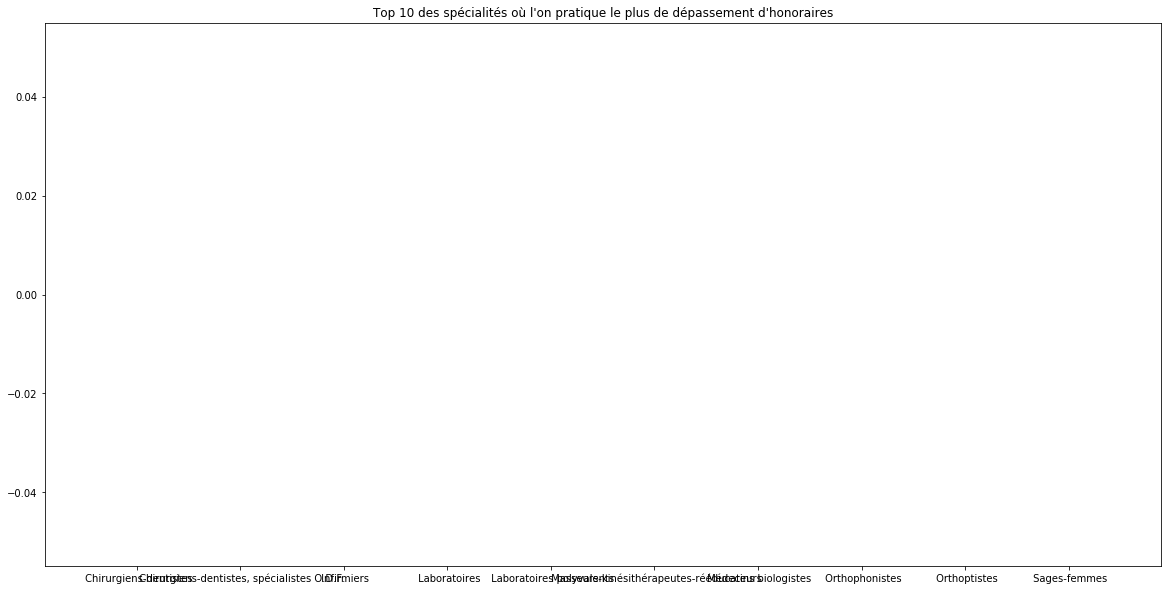

In [46]:
hon_moy_spe_min = hon_moy_spe.sort_values(ascending=False).tail(10)
plt.figure(figsize=(20,10))
plt.bar(hon_moy_spe_min.index, 
        hon_moy_spe_min.values) 
plt.title("Top 10 des spécialités où l'on pratique le plus de dépassement d'honoraires")
plt.show()

In [89]:
# Quelles sont les départements qui apparaissent le plus lorsqu'on a 75% D'honoraires pratiqués?
df2['DEPARTEMENT'].loc[df2["TOTAL"] >= 10].loc[df2['HONORAIRES LIBRES'] >=0.75].value_counts().head(10)

 Paris (Ville)       21
 Rhône               19
 Alpes-Maritimes     12
 Hauts-de-Seine       9
 Yvelines             8
 Val-de-Marne         7
 Gironde              7
 Bouches-du-Rhône     6
 Isère                6
 Bas-Rhin             5
Name: DEPARTEMENT, dtype: int64

In [51]:
# Ajout de l'age de la population en France par département
xls = pd.ExcelFile('estim-pop-dep-sexe-gca-1975-2016.xls')
ages = xls.parse('2016', header=4)
ages

,,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans.1,20 à 39 ans.1,40 à 59 ans.1,60 à 74 ans.1,75 ans et plus.1,Total.1,0 à 19 ans.2,20 à 39 ans.2,40 à 59 ans.2,60 à 74 ans.2,75 ans et plus.2,Total.2
01,Ain,167535.0,148536.0,178822.0,95150.0,50357.0,640400.0,86266.0,74826.0,89580.0,46280.0,20113.0,317065.0,81269.0,73710.0,89242.0,48870.0,30244.0,323335.0
02,Aisne,135494.0,118723.0,145229.0,89232.0,49187.0,537865.0,69169.0,59425.0,72056.0,42922.0,18033.0,261605.0,66325.0,59298.0,73173.0,46310.0,31154.0,276260.0
03,Allier,72063.0,64777.0,92714.0,68209.0,45236.0,342999.0,36775.0,32487.0,45675.0,32317.0,17346.0,164600.0,35288.0,32290.0,47039.0,35892.0,27890.0,178399.0
04,Alpes-de-Haute-Provence,34908.0,30310.0,44319.0,32344.0,19712.0,161593.0,18078.0,15018.0,21672.0,15786.0,7986.0,78540.0,16830.0,15292.0,22647.0,16558.0,11726.0,83053.0
05,Hautes-Alpes,31452.0,28149.0,39489.0,25933.0,15420.0,140443.0,16002.0,14264.0,19573.0,12658.0,6261.0,68758.0,15450.0,13885.0,19916.0,13275.0,9159.0,71685.0
06,Alpes-Maritimes,228871.0,243208.0,289555.0,191429.0,130772.0,1083835.0,118164.0,119279.0,139572.0,87683.0,49850.0,514548.0,110707.0,123929.0,149983.0,103746.0,80922.0,569287.0
07,Ardèche,73294.0,62582.0,90156.0,62556.0,36795.0,325383.0,37490.0,31174.0,45089.0,30477.0,14715.0,158945.0,35804.0,31408.0,45067.0,32079.0,22080.0,166438.0
08,Ardennes,66388.0,59909.0,76708.0,46946.0,27052.0,277003.0,34097.0,29985.0,38110.0,22691.0,10030.0,134913.0,32291.0,29924.0,38598.0,24255.0,17022.0,142090.0
09,Ariège,32151.0,29249.0,41982.0,30142.0,19143.0,152667.0,16687.0,14832.0,20722.0,14964.0,7549.0,74754.0,15464.0,14417.0,21260.0,15178.0,11594.0,77913.0
10,Aube,75522.0,69916.0,80513.0,52678.0,31775.0,310404.0,38723.0,35252.0,39785.0,25072.0,11840.0,150672.0,36799.0,34664.0,40728.0,27606.0,19935.0,159732.0


In [54]:
#Les colonnes sont en doubles car les Hommes et les Femmes sont séparés. 
# Ils sont dans les colonnes en .1 et .2 le reste est la somme des 2.
# On va drop les colonnes inutiles
ages = ages[['0 à 19 ans', '20 à 39 ans', '40 à 59 ans', '60 à 74 ans', '75 ans et plus', 'Total']]

In [55]:
ages

,,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total
01,Ain,167535.0,148536.0,178822.0,95150.0,50357.0,640400.0
02,Aisne,135494.0,118723.0,145229.0,89232.0,49187.0,537865.0
03,Allier,72063.0,64777.0,92714.0,68209.0,45236.0,342999.0
04,Alpes-de-Haute-Provence,34908.0,30310.0,44319.0,32344.0,19712.0,161593.0
05,Hautes-Alpes,31452.0,28149.0,39489.0,25933.0,15420.0,140443.0
06,Alpes-Maritimes,228871.0,243208.0,289555.0,191429.0,130772.0,1083835.0
07,Ardèche,73294.0,62582.0,90156.0,62556.0,36795.0,325383.0
08,Ardennes,66388.0,59909.0,76708.0,46946.0,27052.0,277003.0
09,Ariège,32151.0,29249.0,41982.0,30142.0,19143.0,152667.0
10,Aube,75522.0,69916.0,80513.0,52678.0,31775.0,310404.0
